<h1 style="color:#fce444;font-size:45px;font-family:Georgia;text-align:center;"><strong>🔌Energía de Electrodométicos🔋 <strong style="color:black;font-size:40px;font-family:Georgia;"> <strong style="color:#fce444;font-size:40px;font-family:Georgia;">Proyecto de Aprendizaje de maquinas simulado</strong></strong></strong></h1>
    


###  📊 Actividad de ML ejemplo de regresión

### Descripción del problema:

En este trabajo, se cuenta con un conjunto de datos que registra el consumo de energía de los electrodomésticos en una vivienda durante aproximadamente 4.5 meses. Este registro incluye variables como la temperatura y la humedad en diferentes áreas de la casa, la temperatura y la humedad externas, la presión atmosférica, la velocidad del viento, la visibilidad y el punto de rocío, todos recolectados de una estación meteorológica cercana. También se incluyen dos variables aleatorias que el autor original del conjunto de datos incluyó para probar modelos de regresión y filtrar atributos no predictivos.

### Objetivo del proyecto:

El objetivo de este proyecto es construir un modelo de aprendizaje automático que pueda predecir el consumo de energía de los electrodomésticos en la vivienda basándose en las características ambientales disponibles en el conjunto de datos. Este modelo puede ser de gran utilidad para entender cómo diferentes factores, tanto internos como externos, pueden influir en el consumo de energía de los electrodomésticos. A largo plazo, este conocimiento podría utilizarse para desarrollar estrategias de ahorro de energía o para diseñar sistemas de automatización del hogar más eficientes en términos de energía.

Para lograr este objetivo, se llevarán a cabo los siguientes pasos:

1. **Inspeccionar y mejorar la calidad de los datos:** Esto implica entender la estructura y las características de los datos, lidiar con los valores faltantes o erróneos, y posiblemente transformar los datos para hacerlos más adecuados para los algoritmos de aprendizaje automático.

2. **Diseñar y llevar a cabo experimentos para ajustar los parámetros del modelo:** Esto conlleva seleccionar un algoritmo de aprendizaje automático (o varios) para el modelo, y luego experimentar con diferentes configuraciones de parámetros para encontrar la que ofrece el mejor rendimiento.

3. **Evaluar y comparar el rendimiento de los modelos implementados:** Finalmente, una vez que se haya entrenado los modelos, procedemos a evaluar su rendimiento utilizando métricas apropiadas y posiblemente comparar diferentes modelos para ver cuál funciona mejor.


### Descripción de las variables:
- **T1**:
Temperatura en la zona de la cocina, en grados Celsius

- **RH_1**:
Humedad en la zona de la cocina, en %.

- **T2**:
Temperatura en la zona del salón, en grados Celsius

- **RH_2**:
Humedad en la zona del salón, en %.

- **T3**:
Temperatura en la zona del lavadero

- **RH_3**:
Humedad en la zona del lavadero, en %.

- **T4**:
Humedad en la oficina, en %.

- **RH_4**:
Humedad en la oficina, en %.

- **T5**:
Temperatura en el cuarto de baño, en grados Celsius

- **T6**:
Temperatura en el exterior del edificio (lado norte), en grados Celsius

- **RH_6**:
Humedad en el exterior del edificio (lado norte), en %.

- **T7**:
Temperatura en el cuarto de plancha, en grados Celsius

- **RH_7**:
Humedad en el cuarto de planchado, en %.

- **T8**:
Temperatura en la habitación del adolescente 2, en grados Celsius

- **RH_8**:
Humedad en la habitación de los adolescentes 2, en %.

- **T9**:
Temperatura en la habitación de los padres, en grados Celsius

- **RH_9**:
Humedad en la habitación de los padres, en %.

- **To**:
Temperatura exterior (de la estación meteorológica de Chievres), en Celsius

- **Pressure**:
Presión de la estación meteorológica de Chievres, en mm Hg

- **RH_out**:
Humedad exterior (de la estación meteorológica de Chievres), en %.

- **Wind speed**:
Velocidad del viento de la estación meteorológica de Chievres, en m/s

- **Visibility**:
Visibilidad de la estación meteorológica de Chievres, en km

- **Tdewpoint**:
De la estación meteorológica de Chievres, en Â°C

- **rv1**:
Variable aleatoria 1, adimensional

- **rv2**:
Variable aleatoria 2, no dimensional


### Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

## Leyendo el conjunto de datos

In [2]:
for dirname, _, filenames in os.walk('files'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

files/energydata_complete.csv


In [3]:
df = pd.read_csv('files/energydata_complete.csv')
df

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

In [4]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [5]:
df.tail()

date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

## Exploración de los datos
En esta sección, trabajamos la exploración de los datos para conocer los atributos, tipos de datos, entre otras características de nuestro dataset.

In [6]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [7]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
df.shape

(19735, 29)

In [9]:
df.size

572315

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [11]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

Validamos si existen valores nulos en nuestro conjunto de datos

In [12]:
df.isnull().sum().sort_values(ascending = True)


date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

Como se puede ver, nuestro conjunto de datos no tiene valores nulos

#### Abrimos el conjunto de datos de entrenamiento y prueba
Para esto, se utilizó la función train_test_split de la librería ya importada de sklearn.model_selection. Utilizamos el 75% del conjunto de datos para entrenamiento y el 25% para prueba tal y como indicado el siguiente script

In [13]:
train, test = train_test_split(df,test_size=0.25,random_state=40)

In [14]:
train.describe()

Appliances        lights            T1          RH_1            T2  \
count  14801.000000  14801.000000  14801.000000  14801.000000  14801.000000   
mean      97.835281      3.809202     21.685153     40.271333     20.343487   
std      102.928289      7.940816      1.605537      3.983201      2.199037   
min       10.000000      0.000000     16.790000     27.233333     16.100000   
25%       50.000000      0.000000     20.745000     37.363333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.090000     21.533333   
max     1080.000000     60.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  14801.000000  14801.000000  14801.000000  14801.000000  14801.000000   
mean      40.432370     22.268005     39.252994     20.857724     39.041339   
std        4.081775      1.999986      3.263513      2.040012      4.355528   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.533333     35.530000   
50%       40.500000     22.100000     38.560000     20.666667     38.400000   
75%       43.290000     23.290000     41.790000     22.100000     42.193333   
max       56.026667     29.200000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  14801.000000  14801.000000  14801.000000  14801.000000   
mean   ...     19.484679     41.567732      7.422035    755.561311   
std    ...      2.010610      4.167305      5.304241      7.398129   
min    ...     14.890000     29.166667     -5.000000    729.366667   
25%    ...     18.000000     38.500000      3.700000    750.983333   
50%    ...     19.390000     40.900000      6.933333    756.100000   
75%    ...     20.600000     44.363333     10.433333    760.966667   
max    ...     24.500000     53.326667     26.033333    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  14801.000000  14801.000000  14801.000000  14801.000000  14801.000000   
mean      79.744066      4.057009     38.345054      3.768053     25.014452   
std       14.952250      2.449080     11.785900      4.189370     14.539819   
min       24.500000      0.000000      1.000000     -6.600000      0.006033   
25%       70.000000      2.000000     29.000000      0.933333     12.469764   
50%       83.833333      3.666667     40.000000      3.450000     24.936900   
75%       91.666667      5.500000     40.000000      6.566667     37.736202   
max      100.000000     14.000000     66.000000     15.500000     49.993173   

                rv2  
count  14801.000000  
mean      25.014452  
std       14.539819  
min        0.006033  
25%       12.469764  
50%       24.936900  
75%       37.736202  
max       49.993173  

[8 rows x 28 columns]

**Dividimos las columnas en función del tipo para una gestión clara de las columnas**

In [15]:
col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

**Separamos las variables dependientes e independientes**

In [16]:
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [17]:
feature_vars.describe()

T1            T2            T3            T4            T5  \
count  14801.000000  14801.000000  14801.000000  14801.000000  14801.000000   
mean      21.685153     20.343487     22.268005     20.857724     19.589105   
std        1.605537      2.199037      1.999986      2.040012      1.842916   
min       16.790000     16.100000     17.200000     15.100000     15.335000   
25%       20.745000     18.790000     20.790000     19.533333     18.290000   
50%       21.600000     20.000000     22.100000     20.666667     19.390000   
75%       22.600000     21.533333     23.290000     22.100000     20.633333   
max       26.260000     29.856667     29.200000     26.200000     25.745000   

                 T6            T7            T8            T9          RH_1  \
count  14801.000000  14801.000000  14801.000000  14801.000000  14801.000000   
mean       7.923834     20.264300     22.028348     19.484679     40.271333   
std        6.083047      2.105079      1.951399      2.010610      3.983201   
min       -6.065000     15.390000     16.306667     14.890000     27.233333   
25%        3.663333     18.700000     20.790000     18.000000     37.363333   
50%        7.300000     20.028571     22.111111     19.390000     39.656667   
75%       11.293333     21.600000     23.390000     20.600000     43.090000   
max       28.290000     25.963333     27.230000     24.500000     63.360000   

       ...          RH_9         T_out     Tdewpoint        RH_out  \
count  ...  14801.000000  14801.000000  14801.000000  14801.000000   
mean   ...     41.567732      7.422035      3.768053     79.744066   
std    ...      4.167305      5.304241      4.189370     14.952250   
min    ...     29.166667     -5.000000     -6.600000     24.500000   
25%    ...     38.500000      3.700000      0.933333     70.000000   
50%    ...     40.900000      6.933333      3.450000     83.833333   
75%    ...     44.363333     10.433333      6.566667     91.666667   
max    ...     53.326667     26.033333     15.500000    100.000000   

        Press_mm_hg     Windspeed    Visibility        lights           rv1  \
count  14801.000000  14801.000000  14801.000000  14801.000000  14801.000000   
mean     755.561311      4.057009     38.345054      3.809202     25.014452   
std        7.398129      2.449080     11.785900      7.940816     14.539819   
min      729.366667      0.000000      1.000000      0.000000      0.006033   
25%      750.983333      2.000000     29.000000      0.000000     12.469764   
50%      756.100000      3.666667     40.000000      0.000000     24.936900   
75%      760.966667      5.500000     40.000000      0.000000     37.736202   
max      772.300000     14.000000     66.000000     60.000000     49.993173   

                rv2  
count  14801.000000  
mean      25.014452  
std       14.539819  
min        0.006033  
25%       12.469764  
50%       24.936900  
75%       37.736202  
max       49.993173  

[8 rows x 27 columns]

Verificamos la distribución de valores en la columna de lights

In [18]:
target_vars.describe()

Appliances
count  14801.000000
mean      97.835281
std      102.928289
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

In [19]:
feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

### Inferencias
1. **Columnas de temperatura:** la temperatura en el interior de la vivienda varía entre 14,89 y 29,85 grados, mientras que en el exterior (T6) oscila entre -6,06 y 28,29 grados. La razón de esta variación es que los sensores se mantienen fuera de la casa.

2. **Columnas de humedad:** la humedad en el interior de la casa varía entre el 20,60% y el 63,36%, excepto en RH_5 (baño) y RH_6 (exterior de la casa), que varían entre el 29,82% y el 96,32% y entre el 1% y el 99,9%, respectivamente.

3. **Electrodomésticos:** El 75% del consumo de los electrodomésticos es inferior a 100 Wh . Con un consumo máximo de 1080 Wh, habrá valores atípicos en esta columna y un pequeño número de casos en los que el consumo es muy elevado.

4. **Columna de luces** - Inicialmente creía que la columna de luces podría dar información útil. Con 11438 entradas 0 (cero) en 14801 filas, esta columna no añadirá ningún valor al modelo. Yo creía que el consumo de luz junto con el nivel de humedad en una habitación daría una idea de la presencia humana en la habitación y por lo tanto su impacto en el consumo del aparato. Por lo tanto, por ahora, dejaré de lado esta columna.

## Visualización de Datos

In [20]:
df['date'] = pd.to_datetime(df['date'])

fig = px.line(df, x='date', y='Appliances', title='Appliance energy consumption measurement')
fig.update_layout(xaxis_title='Date', yaxis_title='Energy Consumption (Wh)')

fig.show()


array([[<AxesSubplot:title={'center':'T1'}>,
        <AxesSubplot:title={'center':'T2'}>,
        <AxesSubplot:title={'center':'T3'}>,
        <AxesSubplot:title={'center':'T4'}>,
        <AxesSubplot:title={'center':'T5'}>],
       [<AxesSubplot:title={'center':'T6'}>,
        <AxesSubplot:title={'center':'T7'}>,
        <AxesSubplot:title={'center':'T8'}>,
        <AxesSubplot:title={'center':'T9'}>,
        <AxesSubplot:title={'center':'RH_1'}>],
       [<AxesSubplot:title={'center':'RH_2'}>,
        <AxesSubplot:title={'center':'RH_3'}>,
        <AxesSubplot:title={'center':'RH_4'}>,
        <AxesSubplot:title={'center':'RH_5'}>,
        <AxesSubplot:title={'center':'RH_6'}>],
       [<AxesSubplot:title={'center':'RH_7'}>,
        <AxesSubplot:title={'center':'RH_8'}>,
        <AxesSubplot:title={'center':'RH_9'}>,
        <AxesSubplot:title={'center':'T_out'}>,
        <AxesSubplot:title={'center':'Tdewpoint'}>],
       [<AxesSubplot:title={'center':'RH_out'}>,
        <AxesSubplo

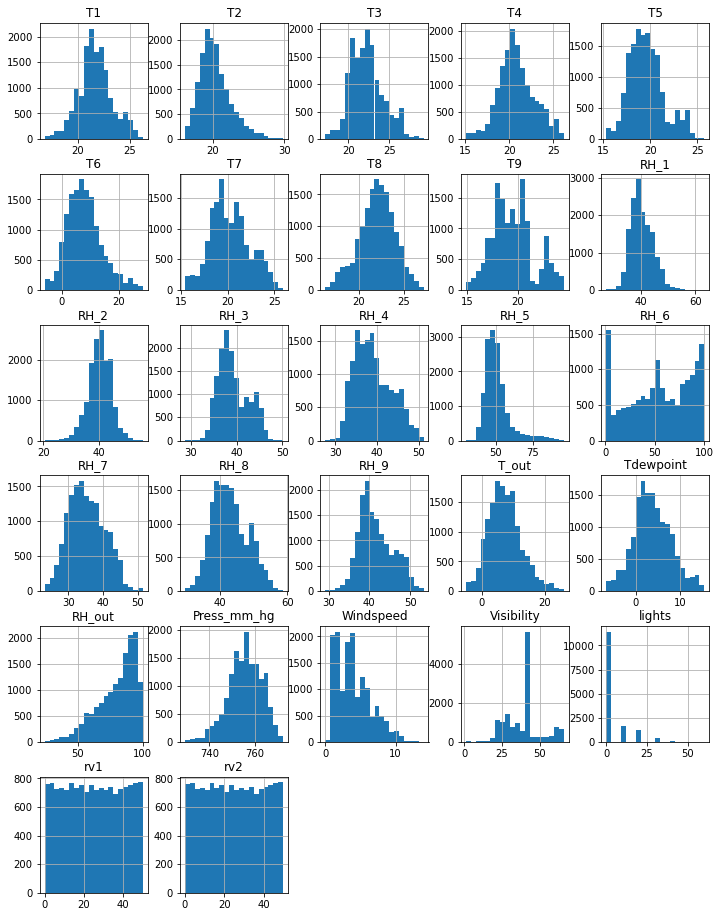

In [21]:
feature_vars.hist(bins = 20 , figsize= (12,16))

Nos centramos en los displots de RH_6, RH_out, Visibility, Windspeed debido a que tienen una distribución irregular

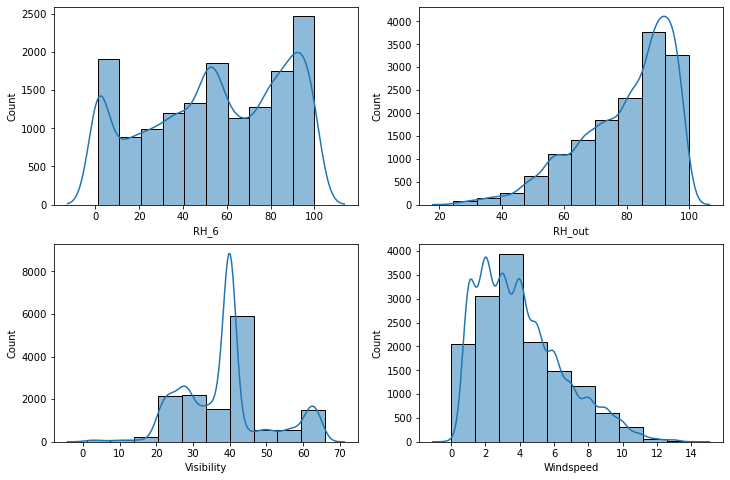

In [22]:
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.histplot(feature_vars["RH_6"],bins=10, ax= ax[0][0], kde=True, kde_kws={"cut": 3})
vis2 = sns.histplot(feature_vars["RH_out"],bins=10, ax=ax[0][1], kde=True, kde_kws={"cut": 3})
vis3 = sns.histplot(feature_vars["Visibility"],bins=10, ax=ax[1][0], kde=True, kde_kws={"cut": 3})
vis4 = sns.histplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1], kde=True, kde_kws={"cut": 3})

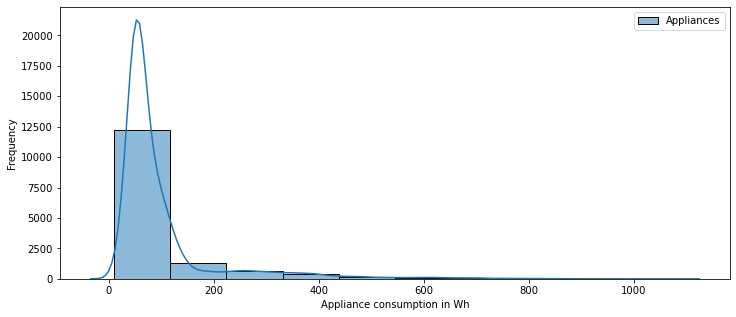

In [23]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.histplot(target_vars , bins=10, kde=True, kde_kws={"cut": 3} ) ;

**Mapa de calor para mostrar la correlación de características**

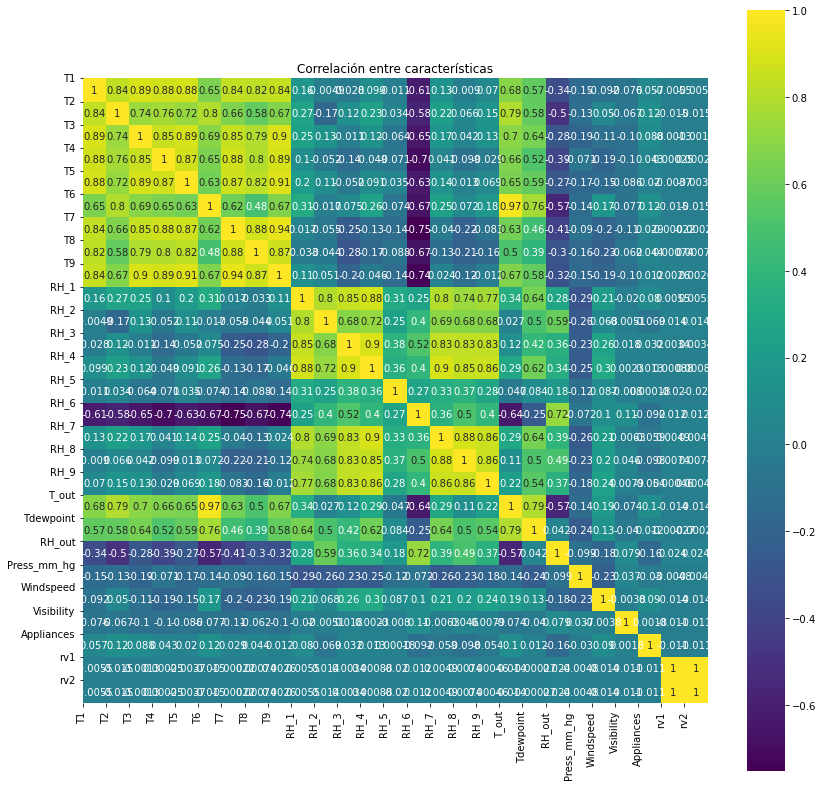

In [24]:
# Utilizamos la columna de weather , temperature , applainces y random  para ver la correlación
train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Ocultar los valores repetidos
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(14, 14))
#Generamos el mapa de calor
sns.heatmap(corr, annot=True, square=True, cmap='viridis', vmax=1)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlación entre características")
    #show plot
plt.show()


In [25]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974683
T7    T9       0.943921
T5    T9       0.910009
T3    T9       0.900209
RH_3  RH_4     0.899889
RH_4  RH_7     0.895120
T1    T3       0.892292
T4    T9       0.888264
T3    T5       0.887545
RH_7  RH_8     0.884849
T1    T5       0.884692
T7    T8       0.881513
RH_1  RH_4     0.880504
T1    T4       0.876682
T4    T7       0.876677
      T5       0.871733
T5    T7       0.869655
T8    T9       0.868251
RH_7  RH_9     0.860155
RH_4  RH_9     0.858454
RH_8  RH_9     0.857476
T3    T4       0.851790
RH_4  RH_8     0.848829
T3    T7       0.846021
RH_1  RH_3     0.845592
T1    T9       0.842862
      T7       0.837079
      T2       0.835729
RH_3  RH_9     0.834419
      RH_7     0.833924
      RH_8     0.831060
T1    T8       0.824657
T5    T8       0.824057
T2    T6       0.801219
RH_1  RH_7     0.800827
      RH_2     0.797598
T4    T8       0.796458
T3    T8       0.794213
T2    T_out    0.791553
dtype: float64

### Inferencias
1. **Temperatura:** Todas las columnas/variables de temperatura muestran una distribución normal a excepción de la T9. En el mapa de calor, observamos que todas las temperaturas desde la T1 hasta T9 y T_out tienen valores positivos de correlación con la variable objetivo "Aplliances". Para las temperaturas interiores, las correlaciones son altas, como era de esperar, ya que la ventilación es impulsada por la unidad HRV y minimiza las diferencias de temperatura del aire entre las habitaciones. Cuatro columnas tienen un alto grado de correlación con T9-73,T5,T7,T8 también T6 y T_out tiene una alta correlación (ambas temperaturas del exterior). Por lo tanto, T6 y T9 pueden eliminarse del conjunto de train a futuro, ya que la información que proporcionan puede obtenerse en otros campos.

2. **Columnas de humedad:** Todas las columnas siguen una distribución normal a diferencia de RH_6 y RH_out, debido a que esos sensores están fuera de la casa. El mapa de calor, nos muestra también que no hay casos de correlación significativamente alta (> 0,9) para los sensores de humedad.

3. **Electrodomésticos:** Esta columna está sesgada positivamente, la mayoría de los valores están alrededor de la media 100 Wh. Aunque hay valores atípicos en esta columna.

4. **Columna de luces:** Las columnas de visibility están negativamente sesgadas
5. **Velocidad del viento:** La columna está positivamente sesgada
6. **Variables random:** Estas variables rv1 y rv2 no tienen ningún papel

## Preprocesamiento de Datos

Cambiamos los valores de las variables, para tener una mejor comprensión y facilidad al trabajar con ellas

In [26]:
## diccionario de columnas para renombrar
rename_dict = {
    'Appliances': 'Appliances_energy',
    'lights': 'lights_energy',
    'T1': 'T_kitchen',
    'RH_1': 'RH_kitchen',
    'T2': 'T_livingroom',
    'RH_2': 'RH_livingroom',
    'T3': 'T_laundryroom',
    'RH_3': 'RH_laundryroom',
    'T4': 'T_officeroom',
    'RH_4': 'RH_officeroom',
    'T5': 'T_bathroom',
    'RH_5': 'RH_bathroom',
    'T6': 'T_OutsideBuliding',
    'RH_6': 'RH_OutsideBuilding',
    'T7': 'T_ironingroom',
    'RH_7': 'RH_ironingroom',
    'T8': 'T_teenagerroom2',
    'RH_8': 'RH_teenagerroom2',
    'T9': 'T_parentsroom',
    'RH_9': 'RH_parentsroom',
}

train.rename(columns=rename_dict, inplace=True)
test.rename(columns=rename_dict, inplace=True)

In [27]:
col_temp = [rename_dict.get(col, col) for col in col_temp]
col_hum = [rename_dict.get(col, col) for col in col_hum]
col_light = [rename_dict.get(col, col) for col in col_light]
col_target = [rename_dict.get(col, col) for col in col_target]

# No necesitamos actualizar col_weather, col_light, y col_randoms, ya que esos nombres de columnas no cambiaron
# Ahora puedes usar las listas de características actualizadas para seleccionar las columnas en tus conjuntos de datos
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [28]:
train.columns

Index(['date', 'Appliances_energy', 'lights_energy', 'T_kitchen', 'RH_kitchen',
       'T_livingroom', 'RH_livingroom', 'T_laundryroom', 'RH_laundryroom',
       'T_officeroom', 'RH_officeroom', 'T_bathroom', 'RH_bathroom',
       'T_OutsideBuliding', 'RH_OutsideBuilding', 'T_ironingroom',
       'RH_ironingroom', 'T_teenagerroom2', 'RH_teenagerroom2',
       'T_parentsroom', 'RH_parentsroom', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [29]:
test.columns

Index(['date', 'Appliances_energy', 'lights_energy', 'T_kitchen', 'RH_kitchen',
       'T_livingroom', 'RH_livingroom', 'T_laundryroom', 'RH_laundryroom',
       'T_officeroom', 'RH_officeroom', 'T_bathroom', 'RH_bathroom',
       'T_OutsideBuliding', 'RH_OutsideBuilding', 'T_ironingroom',
       'RH_ironingroom', 'T_teenagerroom2', 'RH_teenagerroom2',
       'T_parentsroom', 'RH_parentsroom', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Verificamos el tipo de dato de date

In [30]:
train['date'].dtype

dtype('O')

In [31]:
test['date'].dtype

dtype('O')

Convertimos a datetime

In [32]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [33]:
train.dtypes

date                  datetime64[ns]
Appliances_energy              int64
lights_energy                  int64
T_kitchen                    float64
RH_kitchen                   float64
T_livingroom                 float64
RH_livingroom                float64
T_laundryroom                float64
RH_laundryroom               float64
T_officeroom                 float64
RH_officeroom                float64
T_bathroom                   float64
RH_bathroom                  float64
T_OutsideBuliding            float64
RH_OutsideBuilding           float64
T_ironingroom                float64
RH_ironingroom               float64
T_teenagerroom2              float64
RH_teenagerroom2             float64
T_parentsroom                float64
RH_parentsroom               float64
T_out                        float64
Press_mm_hg                  float64
RH_out                       float64
Windspeed                    float64
Visibility                   float64
Tdewpoint                    float64
r

In [34]:
test.dtypes

date                  datetime64[ns]
Appliances_energy              int64
lights_energy                  int64
T_kitchen                    float64
RH_kitchen                   float64
T_livingroom                 float64
RH_livingroom                float64
T_laundryroom                float64
RH_laundryroom               float64
T_officeroom                 float64
RH_officeroom                float64
T_bathroom                   float64
RH_bathroom                  float64
T_OutsideBuliding            float64
RH_OutsideBuilding           float64
T_ironingroom                float64
RH_ironingroom               float64
T_teenagerroom2              float64
RH_teenagerroom2             float64
T_parentsroom                float64
RH_parentsroom               float64
T_out                        float64
Press_mm_hg                  float64
RH_out                       float64
Windspeed                    float64
Visibility                   float64
Tdewpoint                    float64
r

Procedemos a dividir el conjunto de entrenamiento y prueba en variables independiente y dependientes

In [35]:
train_X = train[feature_vars.columns]
train_Y = train[target_vars.columns]

In [36]:
test_X = test[feature_vars.columns]
test_Y = test[target_vars.columns]

In [37]:
train_X.drop(["rv1","rv2","Visibility","T_OutsideBuliding","T_parentsroom"],axis=1 , inplace=True)
test_X.drop(["rv1","rv2","Visibility","T_OutsideBuliding","T_parentsroom"], axis=1, inplace=True)

/var/folders/ld/g46v1vjx41qc0t77b_lw34fh0000gp/T/ipykernel_1879/2166121627.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ld/g46v1vjx41qc0t77b_lw34fh0000gp/T/ipykernel_1879/2166121627.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
train_X.columns

Index(['T_kitchen', 'T_livingroom', 'T_laundryroom', 'T_officeroom',
       'T_bathroom', 'T_ironingroom', 'T_teenagerroom2', 'RH_kitchen',
       'RH_livingroom', 'RH_laundryroom', 'RH_officeroom', 'RH_bathroom',
       'RH_OutsideBuilding', 'RH_ironingroom', 'RH_teenagerroom2',
       'RH_parentsroom', 'T_out', 'Tdewpoint', 'RH_out', 'Press_mm_hg',
       'Windspeed', 'lights_energy'],
      dtype='object')

In [39]:
test_X.columns

Index(['T_kitchen', 'T_livingroom', 'T_laundryroom', 'T_officeroom',
       'T_bathroom', 'T_ironingroom', 'T_teenagerroom2', 'RH_kitchen',
       'RH_livingroom', 'RH_laundryroom', 'RH_officeroom', 'RH_bathroom',
       'RH_OutsideBuilding', 'RH_ironingroom', 'RH_teenagerroom2',
       'RH_parentsroom', 'T_out', 'Tdewpoint', 'RH_out', 'Press_mm_hg',
       'Windspeed', 'lights_energy'],
      dtype='object')

In [40]:
test[target_vars.columns] = np.log1p(test[target_vars.columns])
test[target_vars.columns]

Appliances_energy
6314            4.110874
12257           6.018593
6271            3.433987
18179           3.713572
9661            4.795791
...                  ...
16384           4.394449
3757            4.615121
19200           3.931826
15776           3.044522
11596           3.433987

[4934 rows x 1 columns]

### Escalamiento de datos

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train = train[list(train_X.columns.values) + col_target]
test = test[list(test_X.columns.values) + col_target]

scaler_train = pd.DataFrame(columns=train.columns, index=train.index)
scaler_train[scaler_train.columns] = scaler.fit_transform(train)

scaler_test = pd.DataFrame(columns=test.columns, index=test.index)
scaler_test[scaler_test.columns] = scaler.transform(test)

In [42]:
scaler_train.head()

T_kitchen  T_livingroom  T_laundryroom  T_officeroom  T_bathroom  \
9544    0.613516      0.247153       0.358333      0.701802    0.368076   
19366   0.729673      0.356191       0.682500      0.765766    0.437560   
10816   0.571278      0.317180       0.483333      0.476577    0.434358   
15457   0.475185      0.154834       0.340833      0.489489    0.379923   
2956    0.475185      0.304580       0.372222      0.332432    0.397748   

       T_ironingroom  T_teenagerroom2  RH_kitchen  RH_livingroom  \
9544        0.530580         0.602685    0.206680       0.489268   
19366       0.719735         0.722612    0.361414       0.630893   
10816       0.520177         0.670735    0.513932       0.687975   
15457       0.388714         0.539518    0.236852       0.489268   
2956        0.345628         0.422948    0.558221       0.754335   

       RH_laundryroom  ...  RH_ironingroom  RH_teenagerroom2  RH_parentsroom  \
9544         0.307447  ...        0.130851          0.305003        0.334989   
19366        0.525004  ...        0.421631          0.472927        0.638383   
10816        0.457704  ...        0.489362          0.486635        0.504829   
15457        0.281508  ...        0.230496          0.457505        0.277180   
2956         0.840941  ...        0.986702          0.956134        0.982340   

          T_out  Tdewpoint    RH_out  Press_mm_hg  Windspeed  lights_energy  \
9544   0.233083   0.316742  0.836645     0.811335   0.095238       0.333333   
19366  0.363050   0.538462  0.916115     0.649068   0.071429       0.000000   
10816  0.591837   0.621418  0.554084     0.483696   0.452381       0.333333   
15457  0.171321   0.278281  0.924945     0.602096   0.142857       0.000000   
2956   0.508056   0.734540  0.902870     0.682453   0.476190       0.166667   

       Appliances_energy  
9544            0.056075  
19366           0.037383  
10816           0.084112  
15457           0.028037  
2956            0.037383  

[5 rows x 23 columns]

In [43]:
scaler_test.head()

T_kitchen  T_livingroom  T_laundryroom  T_officeroom  T_bathroom  \
6314    0.402323      0.254422       0.294167      0.467568    0.265610   
12257   0.655755      0.353526       0.663889      0.576577    0.598623   
6271    0.373108      0.140538       0.333333      0.422523    0.293468   
18179   0.676874      0.384541       0.583333      0.729730    0.611431   
9661    0.518479      0.249576       0.355278      0.492492    0.304035   

       T_ironingroom  T_teenagerroom2  RH_kitchen  RH_livingroom  \
6314        0.379796         0.353372    0.320908       0.511763   
12257       0.625158         0.713457    0.433383       0.683194   
6271        0.341425         0.356424    0.339546       0.578311   
18179       0.764052         0.776625    0.313526       0.502149   
9661        0.407629         0.585291    0.272006       0.523760   

       RH_laundryroom  ...  RH_ironingroom  RH_teenagerroom2  RH_parentsroom  \
6314         0.534351  ...        0.357801          0.326479        0.436515   
12257        0.454900  ...        0.381206          0.280672        0.416529   
6271         0.552578  ...        0.556738          0.551748        0.630519   
18179        0.354550  ...        0.368642          0.335846        0.333570   
9661         0.331672  ...        0.247045          0.273818        0.307257   

          T_out  Tdewpoint    RH_out  Press_mm_hg  Windspeed  lights_energy  \
6314   0.358754   0.247360  0.474614     0.671584   0.142857       0.000000   
12257  0.548335   0.560332  0.543046     0.537267   0.285714       0.166667   
6271   0.120838   0.224736  0.964680     0.712733   0.130952       0.000000   
18179  0.501074   0.576169  0.668874     0.727484   0.071429       0.166667   
9661   0.345865   0.467572  0.834437     0.764752   0.285714       0.000000   

       Appliances_energy  
6314           -0.005504  
12257          -0.003721  
6271           -0.006136  
18179          -0.005875  
9661           -0.004864  

[5 rows x 23 columns]

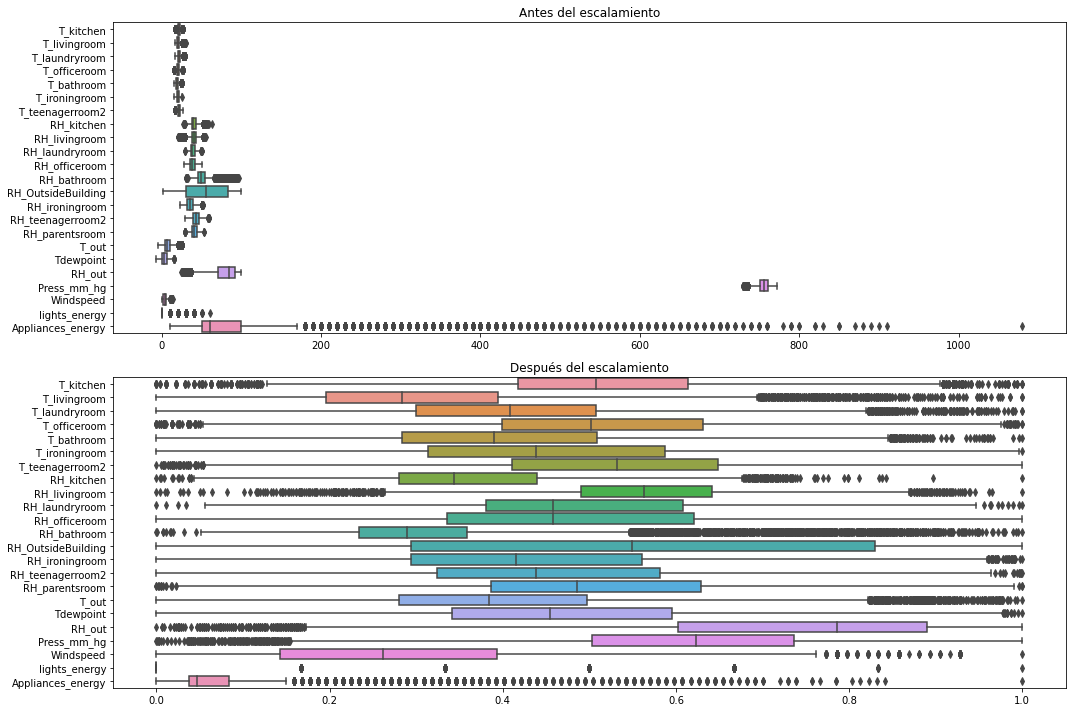

In [44]:
plt.figure(figsize=(15, 10))

# Gráfica antes del escalamiento
plt.subplot(2, 1, 1)
sns.boxplot(data=train, orient="h")
plt.title('Antes del escalamiento')

# Gráfica después del escalamiento
plt.subplot(2, 1, 2)
sns.boxplot(data=scaler_train, orient="h")
plt.title('Después del escalamiento')

plt.tight_layout()
plt.show()


In [45]:
print("Antes del preprocesamiento:")
print(train.describe())
print("\nDespués del preprocesamiento:")
print(scaler_train.describe())

Antes del preprocesamiento:
          T_kitchen  T_livingroom  T_laundryroom  T_officeroom    T_bathroom  \
count  14801.000000  14801.000000   14801.000000  14801.000000  14801.000000   
mean      21.685153     20.343487      22.268005     20.857724     19.589105   
std        1.605537      2.199037       1.999986      2.040012      1.842916   
min       16.790000     16.100000      17.200000     15.100000     15.335000   
25%       20.745000     18.790000      20.790000     19.533333     18.290000   
50%       21.600000     20.000000      22.100000     20.666667     19.390000   
75%       22.600000     21.533333      23.290000     22.100000     20.633333   
max       26.260000     29.856667      29.200000     26.200000     25.745000   

       T_ironingroom  T_teenagerroom2    RH_kitchen  RH_livingroom  \
count   14801.000000     14801.000000  14801.000000   14801.000000   
mean       20.264300        22.028348     40.271333      40.432370   
std         2.105079         1.951399    

**Removemos la variables objetivo del conjunto de entrenamiento y prueba**

In [46]:
train_X =  scaler_train.drop(['Appliances_energy'] , axis=1)
train_Y = scaler_train['Appliances_energy']

test_X =  scaler_test.drop(['Appliances_energy'] , axis=1)
test_Y = scaler_test['Appliances_energy']

In [47]:
train_X.head()

T_kitchen  T_livingroom  T_laundryroom  T_officeroom  T_bathroom  \
9544    0.613516      0.247153       0.358333      0.701802    0.368076   
19366   0.729673      0.356191       0.682500      0.765766    0.437560   
10816   0.571278      0.317180       0.483333      0.476577    0.434358   
15457   0.475185      0.154834       0.340833      0.489489    0.379923   
2956    0.475185      0.304580       0.372222      0.332432    0.397748   

       T_ironingroom  T_teenagerroom2  RH_kitchen  RH_livingroom  \
9544        0.530580         0.602685    0.206680       0.489268   
19366       0.719735         0.722612    0.361414       0.630893   
10816       0.520177         0.670735    0.513932       0.687975   
15457       0.388714         0.539518    0.236852       0.489268   
2956        0.345628         0.422948    0.558221       0.754335   

       RH_laundryroom  ...  RH_OutsideBuilding  RH_ironingroom  \
9544         0.307447  ...            0.574587        0.130851   
19366        0.525004  ...            0.393225        0.421631   
10816        0.457704  ...            0.328615        0.489362   
15457        0.281508  ...            0.507179        0.230496   
2956         0.840941  ...            1.000000        0.986702   

       RH_teenagerroom2  RH_parentsroom     T_out  Tdewpoint    RH_out  \
9544           0.305003        0.334989  0.233083   0.316742  0.836645   
19366          0.472927        0.638383  0.363050   0.538462  0.916115   
10816          0.486635        0.504829  0.591837   0.621418  0.554084   
15457          0.457505        0.277180  0.171321   0.278281  0.924945   
2956           0.956134        0.982340  0.508056   0.734540  0.902870   

       Press_mm_hg  Windspeed  lights_energy  
9544      0.811335   0.095238       0.333333  
19366     0.649068   0.071429       0.000000  
10816     0.483696   0.452381       0.333333  
15457     0.602096   0.142857       0.000000  
2956      0.682453   0.476190       0.166667  

[5 rows x 22 columns]

In [48]:
train_Y.head()

9544     0.056075
19366    0.037383
10816    0.084112
15457    0.028037
2956     0.037383
Name: Appliances_energy, dtype: float64

# Implementación de los Modelos

### Árboles de decisión

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Ajustar el árbol de decisión simple
dt_simple = DecisionTreeRegressor(random_state=42)

In [50]:
%%time
dt_simple.fit(train_X, train_Y)

CPU times: user 292 ms, sys: 1.58 ms, total: 293 ms
Wall time: 294 ms


DecisionTreeRegressor(random_state=42)

In [51]:
# Predecir y calcular el error cuadrático medio
y_pred_simple = dt_simple.predict(test_X)
mse_simple = mean_squared_error(test_Y, y_pred_simple)

print("Error cuadrático medio del árbol de decisión simple: ", mse_simple)

Error cuadrático medio del árbol de decisión simple:  0.016793261790526457


**Utilizando GridSearchCV**

In [52]:


# Definir los parámetros para la búsqueda en malla
params = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Ajustar GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=5, scoring='neg_mean_squared_error')

In [53]:
%%time
grid_search.fit(train_X, train_Y)

CPU times: user 44.2 s, sys: 79.6 ms, total: 44.3 s
Wall time: 44.4 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [1]:
print("Mejores parámetros: ", grid_search.best_params_)

NameError: name 'grid_search' is not defined

**Aplicando los mejores parámetros**

In [55]:
# Ajustar el árbol de decisión con los mejores parámetros
dt_best = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                min_samples_split=grid_search.best_params_['min_samples_split'],
                                min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                random_state=42)
dt_best.fit(train_X, train_Y)

# Predecir y calcular el error cuadrático medio
y_pred_best = dt_best.predict(test_X)
mse_best = mean_squared_error(test_Y, y_pred_best)

print("Error cuadrático medio del árbol de decisión con los mejores parámetros: ", mse_best)

Error cuadrático medio del árbol de decisión con los mejores parámetros:  0.01287331265184981


**Antes y después de GridSearchCV**

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Árbol de decisión simple
y_pred_simple = dt_simple.predict(test_X)
print("Árbol de Decisión Simple:")
print("Error Absoluto Medio (MAE): ", mean_absolute_error(test_Y, y_pred_simple))
print("Error Cuadrático Medio (MSE): ", mean_squared_error(test_Y, y_pred_simple))
print("Coeficiente de determinación R2: ", r2_score(test_Y, y_pred_simple))

# Árbol de decisión con los mejores parámetros
y_pred_best = dt_best.predict(test_X)
print("\nÁrbol de Decisión con los Mejores Parámetros:")
print("Error Absoluto Medio (MAE): ", mean_absolute_error(test_Y, y_pred_best))
print("Error Cuadrático Medio (MSE): ", mean_squared_error(test_Y, y_pred_best))
print("Coeficiente de determinación R2: ", r2_score(test_Y, y_pred_best))


Árbol de Decisión Simple:
Error Absoluto Medio (MAE):  0.08715893249206645
Error Cuadrático Medio (MSE):  0.016793261790526457
Coeficiente de determinación R2:  -46153.42873657694

Árbol de Decisión con los Mejores Parámetros:
Error Absoluto Medio (MAE):  0.08724268170894357
Error Cuadrático Medio (MSE):  0.01287331265184981
Coeficiente de determinación R2:  -35379.88066540227


### LSTM

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# Obtener las dimensiones de los datos
n_timesteps, n_features = train_X.shape[1], train_X.shape[2]
n_labels = train_Y.shape[1]

In [ ]:
# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(n_timesteps, n_features)))
model.add(Dense(1,activation='ReLU'))

In [ ]:
# Compilar el modelo
model.compile(loss='mse', optimizer='adam', metrics=['accuracy', 'mse','mae','mape','msle'])

In [ ]:
# Entrenar el modelo
model.fit(train_X, train_Y, epochs=10, batch_size=32)

In [ ]:
# Realizar predicciones
predictions = model.predict(test_X)

In [ ]:
# Evaluar el modelo
mse = np.mean((predictions - test_Y) ** 2)

In [ ]:
print("Error cuadrático medio (MSE):", mse)

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_default = RandomForestRegressor(random_state=0)
rf_default.fit(train_X, train_Y)

pred_rf_default = rf_default.predict(test_X)

mse_rf_default = mean_squared_error(test_Y, pred_rf_default)

print("Error cuadrático medio del Random Forest simple: ", mse_rf_default)

**Utilizando GridSearch**

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

rf = RandomForestRegressor(random_state=0)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [ ]:
%%time
grid_search_rf.fit(train_X, train_Y)

In [ ]:
print("Mejores parámetros: ", grid_search_rf.best_params_)

**Aplicando los mejores parámetros**

In [ ]:
best_grid_rf = grid_search_rf.best_estimator_

pred_rf_best = best_grid_rf.predict(test_X)

mse_rf_best = mean_squared_error(test_Y, pred_rf_best)

print("Error cuadrático medio del Random Forest con los mejores parámetros: ", mse_rf_best)

**Antes y después de GridSearchCV**

In [ ]:
from math import sqrt

# Para el modelo Random Forest por defecto
mae_rf_default = mean_absolute_error(test_Y, pred_rf_default)
rmse_rf_default = sqrt(mse_rf_default)

# Para el modelo Random Forest con los mejores parámetros
mae_rf_best = mean_absolute_error(test_Y, pred_rf_best)
rmse_rf_best = sqrt(mse_rf_best)

print("Para el modelo Random Forest por defecto:")
print("Error cuadrático medio (MSE): ", mse_rf_default)
print("Error absoluto medio (MAE): ", mae_rf_default)
print("Raíz del error cuadrático medio (RMSE): ", rmse_rf_default)

print("\nPara el modelo Random Forest con los mejores parámetros:")
print("Error cuadrático medio (MSE): ", mse_rf_best)
print("Error absoluto medio (MAE): ", mae_rf_best)
print("Raíz del error cuadrático medio (RMSE): ", rmse_rf_best)